In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [132]:
# Importando a base 
df = pd.read_csv(r"C:\Users\natha\Documents\01-Projetos\analise_TON\cases (1).csv", index_col=[0])

# Printando algumas infos sobre a base
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126989 entries, 0 to 126988
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountid                 77489 non-null  object 
 1   date_ref                  77489 non-null  object 
 2   channelid                 77489 non-null  float64
 3   waitingtime               77489 non-null  float64
 4   missed                    77489 non-null  object 
 5   pesquisa_de_satisfa_o__c  11585 non-null  object 
 6   assunto                   77489 non-null  object 
 7   Id                        77489 non-null  object 
dtypes: float64(2), object(6)
memory usage: 8.7+ MB


In [133]:
# Visualizando quantidade de nulos
df.isnull().sum()

accountid                    49500
date_ref                     49500
channelid                    49500
waitingtime                  49500
missed                       49500
pesquisa_de_satisfa_o__c    115404
assunto                      49500
Id                           49500
dtype: int64

In [134]:
# Removendo nulos e mantendo a pesquisa de satisfacao, pois aparenta ser um campo opcional
df.dropna(subset=['accountid','date_ref','channelid','waitingtime','missed','assunto','Id'], axis=0, inplace=True)

# Validando alteracao
df.isnull().sum()

accountid                       0
date_ref                        0
channelid                       0
waitingtime                     0
missed                          0
pesquisa_de_satisfa_o__c    65904
assunto                         0
Id                              0
dtype: int64

In [135]:
# Verificando se há registros duplicados
len(df) == len(df.drop_duplicates())

True

In [136]:
df.head()

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo:Dúvidas funcionalidades App:Primeir...,0013j00002z0CeEAAU
5,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto:S920:Ativação,0013j00002z0CeEAAU
6,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto:Cartão pré-pago:Dúvidas,0013j00002z0CeEAAU
7,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Logística:Envio de Cartão:Tracking,0013j00002zQgldAAC
8,0013j00002zQgldAAC,2020-08-29,2.0,6.0,False,NaN,Pedido:Cancelamento:Outros,0013j00002zQgldAAC


In [137]:
# Separando o campo de assunto por : para ter mais informacoes na base
df[['assunto1','assunto2','assunto3']] = df.assunto.str.split(':', expand=True)

In [138]:
# visualziando os tipos de assuntos e suas subcategorias (validar alteracao feita em cima)
grafico = px.treemap(
    df,
    path=['assunto1','assunto2']
)
grafico.show()

In [139]:
# Verificando se o campo de accountid e id sao todos iguais
df[df['accountid'] != df['Id']]

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_de_satisfa_o__c,assunto,Id,assunto1,assunto2,assunto3


In [140]:
# Retirando os campos da base que nao vamos utilizar (assunto e id), pois ja termos tratados eles
df.drop(columns=['Id','assunto'], inplace=True)

In [141]:
# Renomeia o campo de pesquisa de satisfacao
df.rename(columns={'pesquisa_de_satisfa_o__c': 'pesquisa_satisfacao'}, inplace=True)

In [142]:
df.head(2)

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_satisfacao,assunto1,assunto2,assunto3
4,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Dúvidas funcionalidades App,Primeiro Acesso
5,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,S920,Ativação


In [143]:
# cruzamnento com a base de credenciamento
# Importa base de credenciamento
cred = pd.read_csv(r"C:\Users\natha\Documents\01-Projetos\analise_TON\creds.csv", index_col=[0])
display(cred.head(5), cred.shape)

,cred_date,shipping_address_city,shipping_address_state,max_machine,accountid
0,2020-04-18,Feira de Santana,BA,T1,NaN
1,2020-10-16,Bacuri,MA,T1,NaN
2,2020-09-01,Bernardo Sayão,TO,T1,NaN
3,2020-08-29,Rio de Janeiro,RJ,T3,NaN
4,2020-07-28,São Gonçalo,RJ,T3,0013j00002z0CeEAAU


(126989, 5)

In [144]:
# remove duplicatas e casos onde o id é nulo
cred.drop_duplicates(subset=['accountid'], inplace=True)
cred = cred[~(cred.accountid.isnull())]

# Comparando shape após remocao
cred.shape

(31429, 5)

In [145]:
# cruzando as bases pelo id 
df_total = pd.merge(
    df,
    cred,
    how='left',
    on='accountid'
)

# Verificando se duplicou algum registro
display(df_total.head(3), df_total.shape)

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_satisfacao,assunto1,assunto2,assunto3,cred_date,shipping_address_city,shipping_address_state,max_machine
0,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Aplicativo,Dúvidas funcionalidades App,Primeiro Acesso,2020-07-28,São Gonçalo,RJ,T3
1,0013j00002z0CeEAAU,2020-07-31,2.0,15.0,False,NaN,Produto,S920,Ativação,2020-07-28,São Gonçalo,RJ,T3
2,0013j00002z0CeEAAU,2020-09-23,2.0,1.0,False,NaN,Produto,Cartão pré-pago,Dúvidas,2020-07-28,São Gonçalo,RJ,T3


(77489, 13)

In [146]:
# Converte o campo de data de string para data no formato ano-mes-dia
df_total['date_ref'] = pd.to_datetime(df_total.date_ref).dt.strftime('%Y-%m-%d')
df_total['safra_ref'] = pd.to_datetime(df_total.date_ref).dt.strftime('%Y%m')

# Converte o campo de data de string para data no formato ano-mes-dia
df_total['cred_date'] = pd.to_datetime(df_total.cred_date).dt.strftime('%Y-%m-%d')
df_total['safra_cred'] = pd.to_datetime(df_total.cred_date).dt.strftime('%Y%m')

# Validando alterecao
df_total.dtypes

accountid                  object
date_ref                   object
channelid                 float64
waitingtime               float64
missed                     object
pesquisa_satisfacao        object
assunto1                   object
assunto2                   object
assunto3                   object
cred_date                  object
shipping_address_city      object
shipping_address_state     object
max_machine                object
safra_ref                  object
safra_cred                 object
dtype: object

In [147]:
# Ordenando a base pela safra
df_total.sort_values(by='safra_ref', inplace=True, ascending=False)

Primeira pergunta

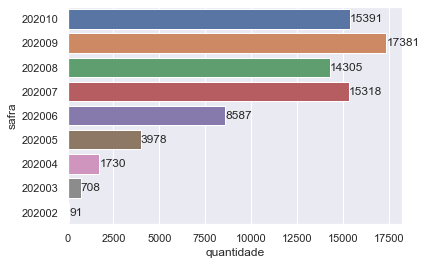

In [148]:
# Alterando o tamanho da figura do grafico
sns.set(rc={'figure.figsize':(6,4)})

# Analisando o número de abertura de chamados após agosto 
ax = sns.countplot(y = df_total.safra_ref);
ax.bar_label(ax.containers[0]);

# Preenchendo labels dos eixos
ax.set(xlabel='quantidade', ylabel='safra');

In [149]:
# Comparacao cenario anterior e atual (3 meses)

# Cria base de 3 meses atras
passado = df_total[
    (df_total.safra_ref.isin(['202007', '202006', '202005']))
].shape[0]

# Total de chamados pos alteracao
pos_alteracao = df_total[
    (df_total.safra_ref.isin(['202008', '202009', '202010']))
].shape[0]

print(f'''
Número dos 3 meses anterios e posteriores a alteração:
    Anterior: {passado}
    Posterior: {pos_alteracao}
    Aumento Percentual: {round((pos_alteracao/passado) * 100)}%
''')


Número dos 3 meses anterios e posteriores a alteração:
    Anterior: 27883
    Posterior: 47077
    Aumento Percentual: 169%



In [150]:
# Tempo de espera para o atendimento 

# Calculo da media tempo antes da alteracao
tempo_antes = round(df_total.waitingtime[(df_total.safra_ref.isin(['202007', '202006', '202005']))].mean())

# Calculo da media tempo depois da alteracao
tempo_depois = round(df_total.waitingtime[(df_total.safra_ref.isin(['202008', '202009', '202010']))].mean())

print(f'''
Tempo de espera para o atendimento:
    Antes: {tempo_antes}
    Depois: {tempo_depois} 
    Melhora percentual: {round(tempo_depois/tempo_antes * 100, 2)} %''')


Tempo de espera para o atendimento:
    Antes: 24
    Depois: 14 
    Melhora percentual: 58.33 %


In [151]:
# Somando os missed
print(f'''
Quantidade de missed:
    Antes: {round(df_total.missed[df_total.safra_ref.isin(['202007', '202006', '202005'])].sum())}
    Depois: {round(df_total.missed[df_total.safra_ref.isin(['202008', '202009', '202010'])].sum())} 
''')


Quantidade de missed:
    Antes: 2
    Depois: 4 



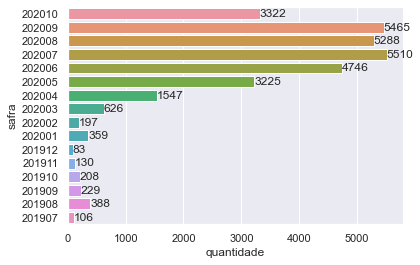

In [152]:
# Criando campo de sagra para a visualizacao
cred['safra_cred'] = pd.to_datetime(cred.cred_date).dt.strftime('%Y%m')

cred.sort_values('safra_cred',inplace=True, ascending=False)

# Alterando o tamanho da figura do grafico
sns.set(rc={'figure.figsize':(6,4)})

# Analisando o número de abertura de chamados após agosto 
ax = sns.countplot(y = cred.safra_cred);
ax.bar_label(ax.containers[0]);

# Preenchendo labels dos eixos
ax.set(xlabel='quantidade', ylabel='safra');

Questao 2

In [153]:
# marca os casos onde o chamado foi aberto após o credenciamento
df_total['prop_pos_cred'] = 0

df_total.loc[
    df_total.date_ref >= df_total.cred_date,
    'prop_pos_cred'] = 1

# marca os casos onde o chamado foi aberto antes do credenciamento
df_total['prop_antes_cred'] = 0

df_total.loc[
    df_total.date_ref < df_total.cred_date,
    'prop_antes_cred'] = 1

print(f'''
Quantidade de chamados abertos
    Total: {df_total.shape[0]}
    Apos o credenciamento: {df_total.prop_pos_cred.sum()}
    Antes do credenciamento: {df_total.prop_antes_cred.sum()}
    ''')


Quantidade de chamados abertos
    Total: 77489
    Apos o credenciamento: 73721
    Antes do credenciamento: 3768
    


In [154]:
# Marcacao de clientes unicos
df_total['cliente'] = 1
df_total.loc[df_total['accountid'].duplicated(keep='first'), 'cliente'] = 0

# Marcando cada linha como um chamado unico
df_total['chamado'] = 1

# Quantidade de clientes
df_total.cliente.sum()

31429

In [155]:
# Media de chamado por cliente 
print(f'''
Numero total de clientes: {df_total.cliente.sum()}
Numero total de chamados válidos: {df_total.shape[0]}
Media de chamado aberto por cliente (geral): {round(df_total.shape[0]/df_total.cliente.sum(), 2)}
Media de chamado aberto por cliente (pós credenciamento): {round(df_total[df_total['prop_pos_cred'] == 1].shape[0]/df_total.cliente.sum(), 2)}
Media de chamado aberto por cliente (antes credenciamento): {round(df_total[df_total['prop_antes_cred'] == 1].shape[0]/df_total.cliente.sum(), 2)}''')


Numero total de clientes: 31429
Numero total de chamados válidos: 77489
Media de chamado aberto por cliente (geral): 2.47
Media de chamado aberto por cliente (pós credenciamento): 2.35
Media de chamado aberto por cliente (antes credenciamento): 0.12


In [156]:
df_total.head(3)

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_satisfacao,assunto1,assunto2,assunto3,cred_date,shipping_address_city,shipping_address_state,max_machine,safra_ref,safra_cred,prop_pos_cred,prop_antes_cred,cliente,chamado
24719,0013j00002uE7bUAAS,2020-10-19,2.0,2.0,False,NaN,Logística,Instalação,D195,2020-10-10,Congonhas (Cornélio Procópio),PR,T2,202010,202010,1,0,1,1
72022,0013j00002z1OadAAE,2020-10-06,2.0,2.0,False,NaN,Produto,Pinpad,Pareamento,2020-10-02,São Paulo do Potengi,RN,T1,202010,202010,1,0,1,1
38902,0013j000030CybQAAS,2020-10-20,2.0,4.0,False,NaN,Cadastro,Recredenciamento,Dúvidas,2020-10-21,Santo andre,SP,T1,202010,202010,0,1,1,1


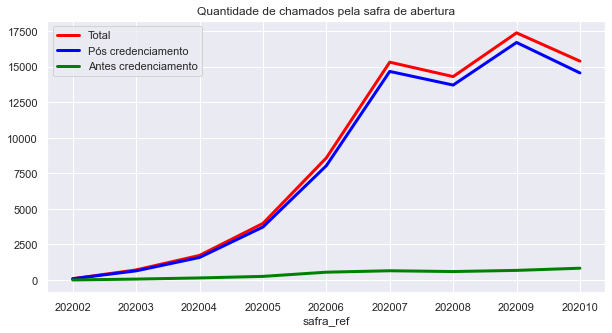

In [157]:
# Criando visualizacao para a comparacao de chamados abertos pela data de abertura
grafico = df_total[
    [ 'chamado','prop_pos_cred','prop_antes_cred', 'safra_ref']
].groupby('safra_ref').sum().plot(linewidth=3, color=['red','blue','green'], )

# Arrumando legenda
grafico.legend(['Total', 'Pós credenciamento', 'Antes credenciamento']);

# Arrumando labels
grafico.set_title('Quantidade de chamados pela safra de abertura', )

# Aumentando tamanho do grafico
grafico.figure.set_size_inches(10,5)

Questao 3

In [158]:
# Visualizando o campo de satisfacao
df_total.pesquisa_satisfacao.unique()

array([nan, 'Enviado', 'Incrivel', 'Bom', 'NaoResolveu', 'MalAtendido',
       'Normal', 'Pessimo', 'Cansativo', 'Feliz', 'Triste'], dtype=object)

In [159]:
# Quantidade de avalicoes (nota-se que possui poucas em comparacao a base toda, por conta disso nao vou utiliza-lo)
df_total.pesquisa_satisfacao.value_counts()

Enviado        9996
Incrivel        899
Bom             425
Normal          112
NaoResolveu     107
Feliz            19
MalAtendido      16
Triste            6
Pessimo           3
Cansativo         2
Name: pesquisa_satisfacao, dtype: int64

In [160]:
# Visualizando os maiores assunto com relacao as avaliacoes
grafico3 = px.parallel_categories(
    df_total,
    dimensions=['assunto1','pesquisa_satisfacao']
)
grafico3.show()

C:\Users\natha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [161]:
# Visualizando os maiores assunto que sao abertos em relacao ao tempo de espera
grafico2 = px.treemap(
    df_total,
    path=['assunto1','waitingtime']
)
grafico2.show()

In [162]:
# Cria uma tabela para analisar a priorizacao do chamados a partir de 3 fatores tempo de espera, quantidade de clientes distintos e numero de chamados
df_prioridade = df_total[
    ['waitingtime','cliente','chamado','assunto1', 'assunto2']
].groupby(['assunto1', 'assunto2']).sum()
df_prioridade.head(6)

waitingtime  cliente  chamado
assunto1   assunto2                                                  
                                             1476.0       26      106
Aplicativo                                     97.0        3        4
           Cartões                          37100.0      943     2474
           Dúvidas funcionalidades App     292176.0     6659    17559
           Problema                          6977.0      213      470
Bandeira   Dúvidas Bandeiras                14516.0      447     1061

In [163]:
# Atribui a média de resolucao de tempo para cada um dos assuntos
df_prioridade['waitingtime'] = round(df_total[
    ['waitingtime','assunto1', 'assunto2']
].groupby(['assunto1', 'assunto2']).mean())

In [164]:
df_prioridade.head(6)

waitingtime  cliente  chamado
assunto1   assunto2                                                  
                                               14.0       26      106
Aplicativo                                     24.0        3        4
           Cartões                             15.0      943     2474
           Dúvidas funcionalidades App         17.0     6659    17559
           Problema                            15.0      213      470
Bandeira   Dúvidas Bandeiras                   14.0      447     1061

In [66]:
pd.options.display.max_rows = 100

In [67]:
# Ordenando base
df_prioridade.sort_values(by=['cliente','waitingtime','chamado'], ascending=False, inplace=True)
df_prioridade.reset_index(inplace=True)

# Criando coluna final com a prioridade
df_prioridade['prioridade'] = [i + 1 for i in range(len(df_prioridade))]
df_prioridade.head(5)

,assunto1,assunto2,waitingtime,cliente,chamado,prioridade
0,Aplicativo,Dúvidas funcionalidades App,17.0,6659,17559,1
1,Logística,OS,18.0,3411,8453,2
2,Produto,Cartão pré-pago,18.0,2366,5918,3
3,Cadastro,Alteração de dados,16.0,2151,5453,4
4,Produto,D195,19.0,1934,5027,5


SQL - 1

i) o volume de chamados por semana dos últimos três meses para cada cluster de clientes proposto na questão 3.

In [85]:
df_total.head(1)

,accountid,date_ref,channelid,waitingtime,missed,pesquisa_satisfacao,assunto1,assunto2,assunto3,cred_date,shipping_address_city,shipping_address_state,max_machine,safra_ref,safra_cred,prop_pos_cred,prop_antes_cred,cliente,chamado
24719,0013j00002uE7bUAAS,2020-10-19,2.0,2.0,False,NaN,Logística,Instalação,D195,2020-10-10,Congonhas (Cornélio Procópio),PR,T2,202010,202010,1,0,1,1


In [109]:
import datetime as dt
from dateutil.relativedelta import relativedelta

# Considerando a data max como current date
hoje = df_total.date_ref.max()
hoje_3_meses = dt.datetime.strptime(hoje,'%Y-%m-%d') - relativedelta(months=3)
hoje_3_meses= hoje_3_meses.strftime('%Y-%m-%d')

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .getOrCreate()

In [ ]:
spark = SparkSession.builder \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

In [114]:
import pandasql as ps
import datetime as dt
from dateutil.relativedelta import relativedelta

# Considerando a data max como current date
hoje = df_total.date_ref.max()


# Realizando diferenca de hoje - 3 meses
# MONTH(date_ref) >= MONTH({hoje})-3 Nao utilizei desta forma pois o pandas nao aceita a funcao month
hoje_3_meses = dt.datetime.strptime(hoje,'%Y-%m-%d') - relativedelta(months=3)
hoje_3_meses= hoje_3_meses.strftime('%Y-%m-%d')

query = f'''
SELECT 
    assunto1 as nivel_1,
    assunto2 as nivel_2,
    count(chamado) as qtd_chamado
FROM 
    df_total
WHERE
    date_ref >= {hoje_3_meses}
GROUP BY
    1, 2
ORDER BY
    1
'''

df_sql1 = ps.sqldf(query, locals())
df_sql1.head(10)

,nivel_1,nivel_2,qtd_chamado
0,,,106
1,Aplicativo,,4
2,Aplicativo,Cartões,2474
3,Aplicativo,Dúvidas funcionalidades App,17559
4,Aplicativo,Problema,470
5,Bandeira,Dúvidas Bandeiras,1061
6,Bandeiras,Dúvidas Bandeiras,230
7,Cadastro,,1
8,Cadastro,Alteração de dados,5453
9,Cadastro,Consulta de Dados,327


SQL-2

ii) uma série histórica dia a dia, que para cada dia retorne o número de chamados referentes aos últimos 30 dias (por exemplo, para o dia 30/01, a query deve retornar a quantidade de chamados totais entre os dias 01/01 e 30/01)
